## Splitting Large PDF into smaller page files

In the process of working on code to help with a specific monthly task in my accounting job.<br>
I created this part of the code to take a 400+ page invoice and split into smaller, <br>
50-page files and save each with a specific name

To run this code, I used the following details to use to located original pdf and set the output directory:

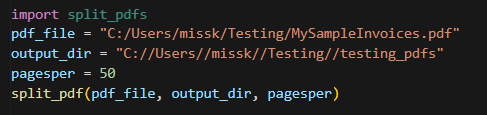

> Author contact: <br>
> Kari Lewallen <br>
> karileelew@gmail.com <br>
> GitHub: kleelew

In [2]:
#import packages
import os
import pypdf

#create a function and provide the file path to original, large PDF file and the directory to save the smaller PDFs
def split_pdf(pdf_file, output_dir, pagesper):
    pdf_reader = pypdf.PdfReader(pdf_file)
    num_pages = len(pdf_reader.pages)

    #Message will display if the number of pages in the original file is less than the number of pages specified in 'pagesper' variable
    if num_pages <= pagesper:
        print("The PDF does not have more pages than specified, so it will not be split.")
        return

    #calculate how many files need to be created
    num_files = num_pages // pagesper + 1

    #if the output directory does not already exist, create it
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    
    #separating into the different files
    for i in range(num_files):
        start_page = i * pagesper
        end_page = min(num_pages, (i + 1) * pagesper)

        #name the output files
        output_file = os.path.join(output_dir, "{}_split_{}.pdf".format(os.path.basename(pdf_file[:-4]), i))
        with open(output_file, "wb") as outfile:
            writer = pypdf.PdfWriter()
            for page in range(start_page, end_page):
                writer.add_page(pdf_reader.pages[page])
            writer.write(outfile)
